# Prog officiel : Simuler à l’aide d’un langage de programmation, la propagation d’une onde périodique.

Amplitude d'une onde progressive en fonction de la position et du temps :

y(x, t) = A * cos{ 2*Pi (t/T - x/lambda) }

$y(x, t) = A \times \cos\left( 2\pi \left(\dfrac{t}{T} - \dfrac{x}{\lambda}\right) \right)$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
Pi = np.pi

### Principe de base

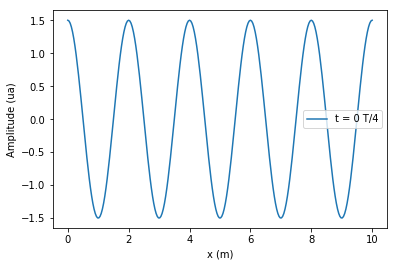

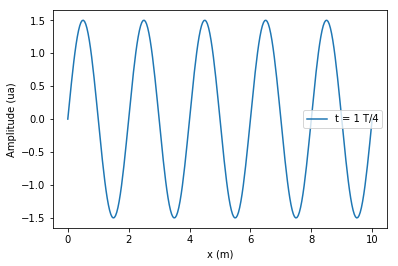

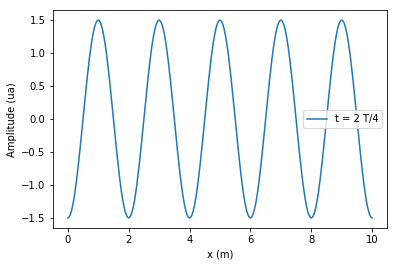

In [3]:
A = 1.5 # amplitude en ua
T = 3  # période en s
lambda_ = 2 # longueur d'onde en m

x = np.linspace(0, 5*lambda_, 256) # l'abscisse s'étend sur 5 longueurs d'onde

for k in range(3): # on trace 3 graphiques (à des instants différents)
    t = k * T/4 # on laisse un quart de période entre 2 graphiques
    y = A*np.cos(2*Pi*(t/T - x/lambda_)) # calcul de l'amplitude de  l'onde
    plt.plot(x, y, label=f't = {k} T/4')
    
    plt.legend()
    plt.ylabel('Amplitude (ua)')
    plt.xlabel('x (m)')

    plt.show()

### On ajoute des points de repère pour suivre la propagation de l'onde

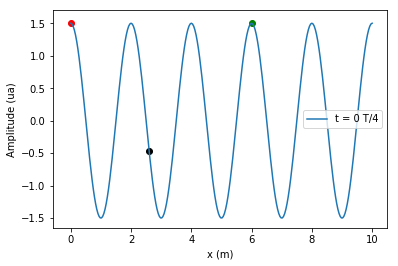

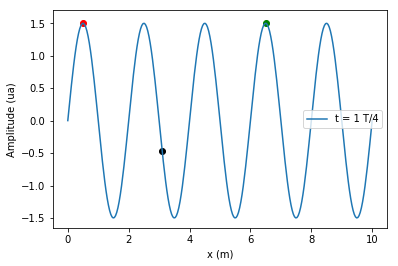

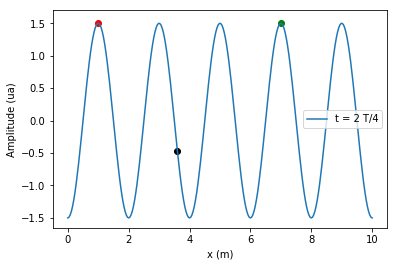

In [4]:
A = 1.5 # amplitude en ua
T = 3  # période en s
lambda_ = 2 # longueur d'onde en m

x = np.linspace(0, 5*lambda_, 256) # l'abscisse s'étend sur 5 longueurs d'onde

for k in range(3): # on trace 3 graphiques (à des instants différents)
    t = k * T/4 # on laisse un quart de période entre 2 graphiques
    y = A*np.cos(2*Pi*(t/T - x/lambda_)) # calcul de l'amplitude de  l'onde
    plt.plot(x, y, label=f't = {k} T/4')
    
    # la suite permet de repérer des points particuliers de l'onde pour mieux suivre sa propagation
    # le 1er 'sommet' avance d'un quart de longueur d'onde à chaque quart de période
    plt.scatter(k*lambda_/4, A, color='red')
    # le 4ème 'sommet' avance d'un quart de lambda à chaque quart de T, avec un décalage de 3 lambda au départ
    plt.scatter(k*lambda_/4+3*lambda_, A*math.cos(2*Pi*3), color='green')
    # avec un décalage arbitraire (1.3 * lambda)
    delta = 1.3
    plt.scatter(k*lambda_/4+delta*lambda_, A*math.cos(2*Pi*delta), color='black')
    
    plt.legend()
    plt.ylabel('Amplitude (ua)')
    plt.xlabel('x (m)')
    plt.show()

### On trace plusieurs sous-graphiques sur une même figure

Text(0.5,0,'x (m)')

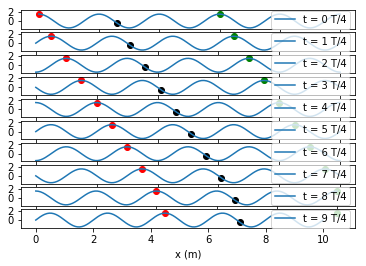

In [5]:
A = 1.5
lambda_ = 2
T = 3
x = np.linspace(0, 5*lambda_, 256)

for k in range(10): # tracé de 10 graphiques
    
    t = k * T/4 # on laisse un quart de période entre 2 graphiques
    
    y = A*np.cos(2*Pi*(t/T - x/lambda_))
    
    # création d'un nouveau graphique  (identifié par le numéro k+1) pour répartir 10 graphiques en 1 colonne
    plt.subplot(10, 1, k+1) 
    
    plt.plot(x, y, label=f't = {k} T/4')
    plt.legend(loc='right') # positionne la légende à droite pour tous les graphes
    
    plt.scatter(k*lambda_/4, A, color='red')
    plt.scatter(k*lambda_/4+3*lambda_, A*math.cos(2*Pi*3), color='green')
    delta = 1.3
    plt.scatter(k*lambda_/4+delta*lambda_, A*math.cos(2*Pi*delta), color='black')
    
plt.xlabel('x (m)')

### Idem mais tout est paramétrable en début de cellule  + quelques paramètres de mise en forme 'jolie'

Text(0.5,0,'x (m)')

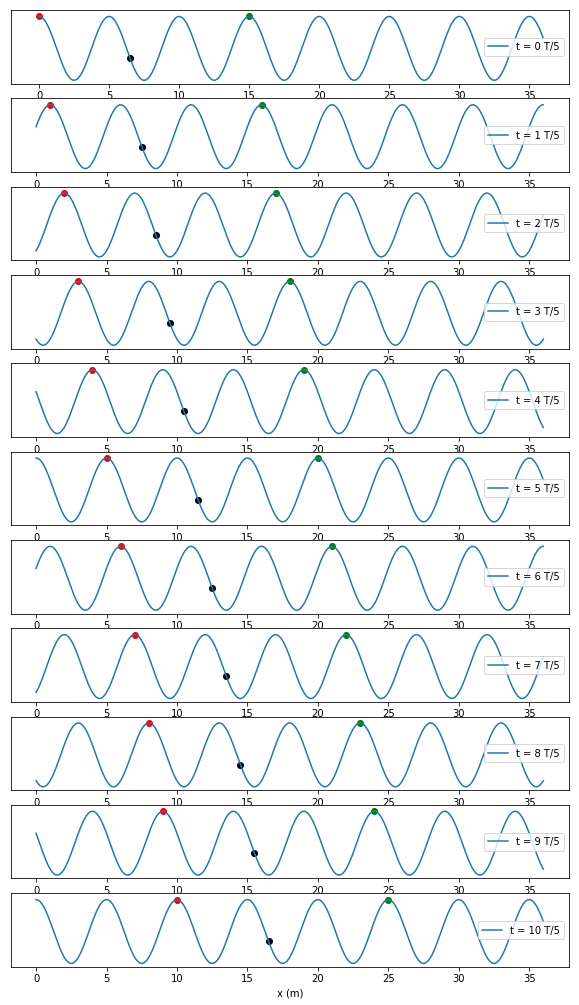

In [6]:
A = 1.5 # amplitude
lambda_ = 5 # longueur d'onde
T = 3 # période
nb_g = 11 # nb de graphiques à tracer
pas = 5 # fraction de période (1/pas) entre 2 graphiques (Delta_t = T/pas)

xmax = lambda_/pas*nb_g + 5*lambda_ # calcul de l'abscisse max pour voir toute la propagation

x = np.linspace(0, xmax, 256) # étendue du graphique en abscisses

plt.figure(figsize=(10, 1.6*nb_g)) # permet de voir correctement tous les graphiques (1.6 inches vertical par graphe)

for k in range(nb_g):
    t = k * T / pas 

    y = A*np.cos(2*Pi*(t/T - x/lambda_))
    
    plt.subplot(nb_g, 1, k+1)
    plt.plot(x, y, label=f't = {k} T/{pas}')
    plt.legend(loc='right')
    
    plt.tick_params(axis='y',left=False, labelleft=False) # supprime l'axe y
    
    plt.scatter(k*lambda_/pas, A, color='red')
    plt.scatter(k*lambda_/pas+3*lambda_, A*math.cos(2*Pi*3), color='green')
    delta = 1.3
    plt.scatter(k*lambda_/pas+delta*lambda_, A*math.cos(2*Pi*delta), color='black')
    
plt.xlabel('x (m)')

### Outil d'animation de matplotlib

<IPython.core.display.Javascript object>


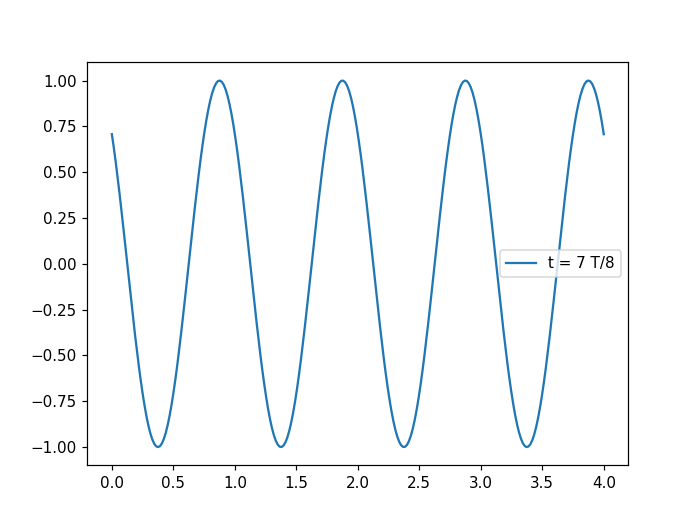

In [7]:
%matplotlib notebook

import matplotlib.animation as animation # librairie complémentaire pour l'animation

Pi = np.pi

T = 10 # période
L = 1 # longueur d'onde
pas = 8 # fraction de période entre 2 images (Delta_t = T / pas)

fig, ax = plt.subplots()

x = np.linspace(0, 4*L, 256) # 256 poitns sur 4 longueurs d'onde
line, = ax.plot(x, np.cos(2*Pi*(0/T - x/L))) # conserve une référence à la ligne tracée (Artist)

def animate(i):
    t = i * T/pas # à chaque image, on augmente le temps
    line.set_ydata(np.cos(2*Pi*(t/T - x/L)))  # maj des données
    line.set_label(f't = {i} T/{pas}') # maj de la légende de la courbe
    plt.legend(loc='right')
    return line,

anim = animation.FuncAnimation(fig, animate, interval=250) # intervalle en ms entre 2 images

plt.show()